In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/CNN_Articels_clean.csv')

In [ ]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (4076, 11)


In [ ]:
print("Column names: ", df.columns.tolist())

Column names:  ['Index', 'Author', 'Date published', 'Category', 'Section', 'Url', 'Headline', 'Description', 'Keywords', 'Second headline', 'Article text']


In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df = df.drop_duplicates()

In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       0
dtype: int64


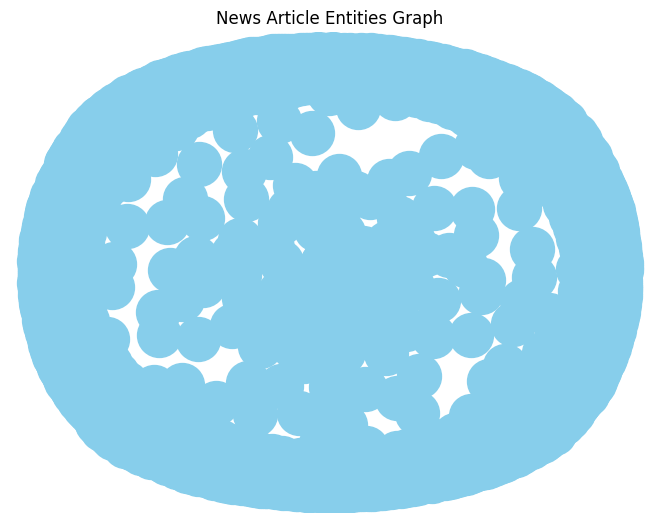

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt



# Create a NetworkX Graph object
G = nx.Graph()

# Extract entities from relevant columns
authors = df['Author'].tolist()
categories = df['Category'].tolist()
keywords = df['Keywords'].str.split(', ').sum()  # Split and flatten the list of keywords

# Add nodes for authors, categories, and keywords
G.add_nodes_from(authors, entity_type="Author")
G.add_nodes_from(categories, entity_type="Category")
G.add_nodes_from(keywords, entity_type="Keyword")

# Iterate through the DataFrame to add edges between co-occurring entities
for index, row in df.iterrows():
    article_id = row['Index']
    article_authors = row['Author']
    article_categories = row['Category']
    article_keywords = row['Keywords'].split(', ')


    for category in article_categories:
        G.add_edge(article_id, category)

    if(index > 2):
      break

# Visualize the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms
labels = {node: node for node in G.nodes()}
nx.draw(G, pos, labels=labels, with_labels=True, node_size=1000, font_size=8, node_color='skyblue')
plt.title("News Article Entities Graph")
plt.show()
